## step 1 : Load the dataset
#### a. Import the dependencies required for our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### b. Load the dataset using pandas library

In [2]:
df = pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


## Step 2: cleaning the dataset
#### a. check the null values present in data or not

In [3]:
# EDA (Exploratory Data Analysis)
# df.isnull().values.any() or
df.isnull().sum()

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64

#### Note: here we dont have null values. if we have, we use dropna or fillna based on the availability of the data
#### b. finding the correlation between columns

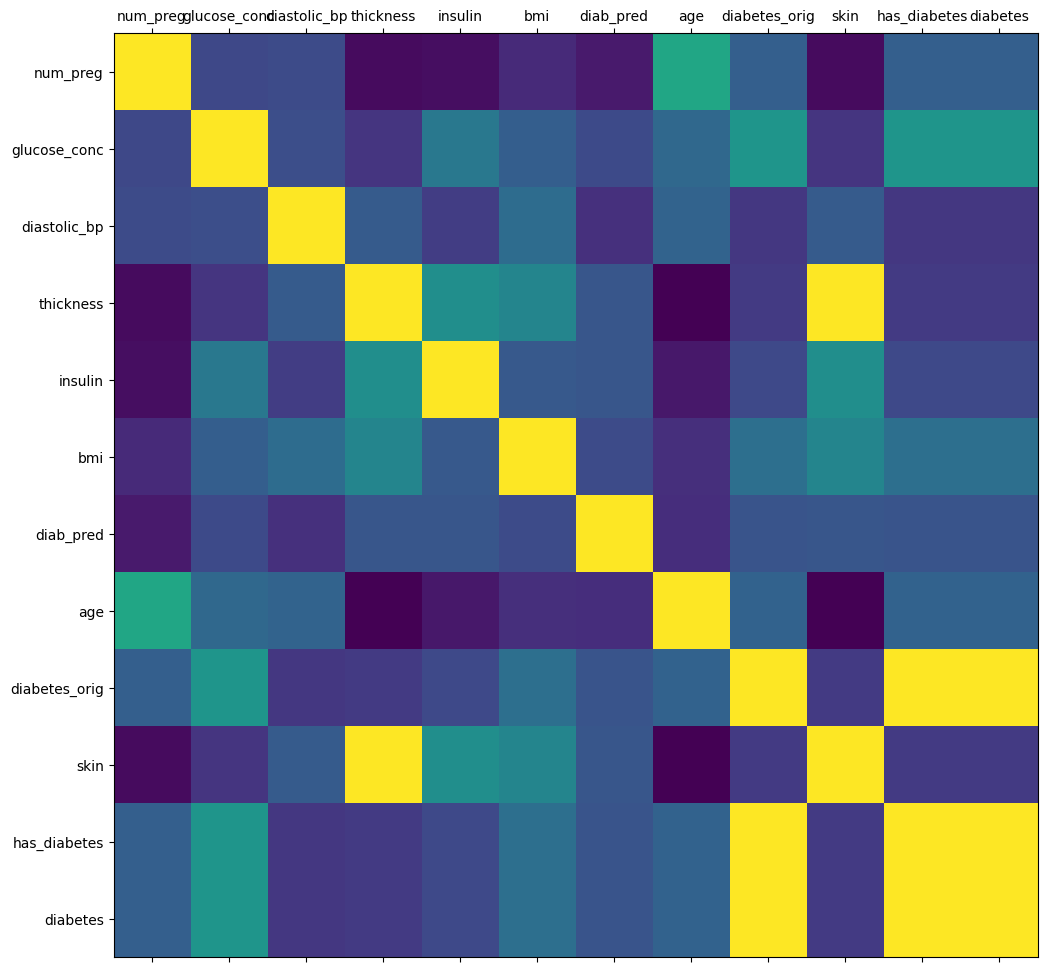

In [4]:
def plot_corr(df,size=12):
    
    # “Calculate correlation between ALL numeric columns”, This creates a correlation matrix (table).
    corr = df.corr()
    
    # “Create a big plotting area” , Without this → plot looks small.
    fig,ax = plt.subplots(figsize=(size,size))
    
    #Draw the correlation matrix as a colored image. This is where colors come from.
    ax.matshow(corr)

    # “Show column names on X and Y axis”
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_corr(df)

In [5]:
# note the correlated columns 

# Correlation: If one value increases, does the other also increase or decrease?
# That plot is called a Correlation Heatmap
# Yellow → strong correlation
# Dark → weak correlation

# Every column is perfectly correlated with itself. “The diagonal values in a correlation heatmap are always 1 
# because each feature is perfectly correlated with itself, so they are ignored during analysis.”

# 1. skin and thickness are correlated with each other
# 2. diabetes_origin and has_diabetes are correlated each other
# 3. diabetes_origin and diabetes are correlated each other
# 4. has_diabetes and diabetes are correlated each other

#### c. Drop the correlated columns

In [6]:
#here we have to drop any one column but in last we have to keep any one result which is has_dia or dia 
# so to keep dia we deleted dia_org in last not dia else
# both the has_dia and diab would be deleted leaving us no result

In [7]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


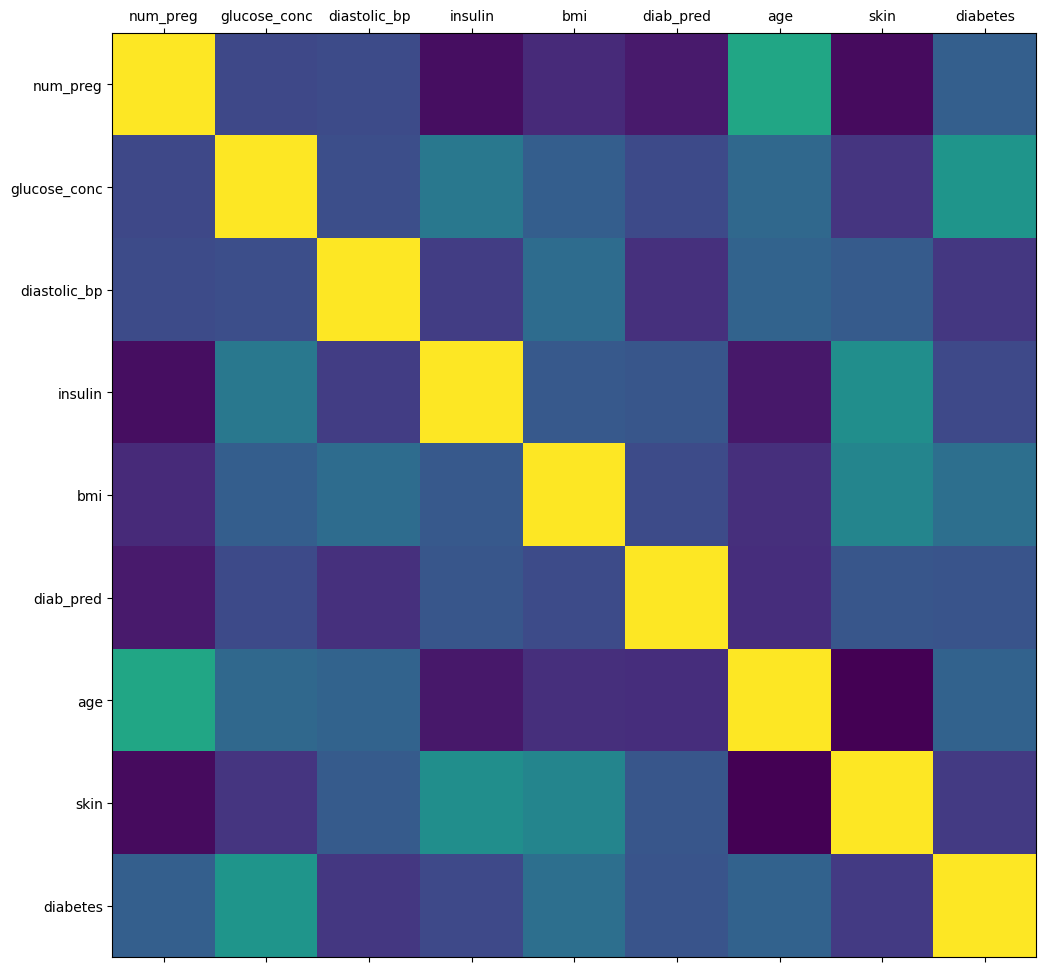

In [9]:
#again check if correlation is present or not
plot_corr(df)

#### d. convert text(boolean or string values including result column) to integer

In [10]:
# pd.set_option('future.no_silent_downcasting', True) # for removing warning

In [11]:
dict1 = {'diabetes' : [True,False]}
dict2 = {'diabetes' : [1,0]}

df.replace(dict1,dict2,inplace=True)
df

C:\Users\monisha br\AppData\Local\Temp\ipykernel_27044\3738832914.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


#### e. check for proportion of the result

In [12]:
# # df['diabetes'] == 1  → creates a boolean condition (True/False)
# # loc is used to FILTER rows based on a CONDITION + column NAME

# num_true = len(df.loc[df['diabetes'] == 1])
# # loc → label-based indexing
# # here we are selecting rows where diabetes column value is 1 (True cases)
# # len() → counts how many such rows exist

# num_false = len(df.loc[df['diabetes'] == 0])
# # selecting rows where diabetes column value is 0 (False cases)

# # calculating percentage of true cases
# per_num_true = (num_true / (num_true + num_false)) * 100

# # calculating percentage of false cases
# per_num_false = (num_false / (num_false + num_true)) * 100


In [13]:
# Condition + column name → use loc
# Row/column number → use iloc

num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

print(f'num_true = {num_true}')
print(f'num_false = {num_false}')

per_num_true = (num_true/(num_true+num_false))*100
print(per_num_true)
per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)


num_true = 268
num_false = 500
34.89583333333333
65.10416666666666


#### Note: Above perecentages say its a balanced dataset
## Step 3 : Train test split

In [14]:
#shuffle all records and split the data for training and testing
#!pip install scikit-learn

#### a. shuffle the data and split the data

In [15]:
from sklearn.model_selection import train_test_split
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [16]:
input_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin']
output_columns = ['diabetes']

x = df[input_columns].values
y = df[output_columns].values

#30 percentage for testing the data
split_test_size = 0.3

#random state because to get everytime the same same shuffled data as randint picks random numbers between that range
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=split_test_size,random_state = 42)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


#### b. check for proportion

In [18]:
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in testing set


In [19]:
print('training true:{0}({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),
                                          (len(y_train[y_train[ : ] == 1])/len(y_train)*100)))
print('training false:{0}({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),
                                          (len(y_train[y_train[ : ] == 0])/len(y_train)*100)))
print('training true:{0}({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),
                                          (len(y_test[y_test[ : ] == 1])/len(y_test)*100)))
print('training false:{0}({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),
                                          (len(y_test[y_test[ : ] == 0])/len(y_test)*100)))

# “After train–test split, the class proportions in training and testing sets remain similar to the original dataset, indicating a balanced split.”b

training true:188(35.01%)
training false:349(64.99%)
training true:80(34.63%)
training false:151(65.37%)


## post split data preparation
#### note: checking 0 in all columns as columns each have min values for human levels so and result column not required

In [20]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [21]:
total_num_preg = len(df.loc[df['num_preg'] == 0])
print(f'number of rows missing in num_preg colums is {total_num_preg}')

total_glucose_conc = len(df.loc[df['glucose_conc'] == 0])
print(f'number of rows missing in glucose_conc colums is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp'] == 0])
print(f'number of rows missing in diastolic_bp colums is {total_diastolic_bp}')

total_insulin = len(df.loc[df['insulin'] == 0])
print(f'number of rows missing in insulin colums is {total_insulin}')

total_bmi = len(df.loc[df['bmi'] == 0])
print(f'number of rows missing in bmi colums is {total_bmi}')

total_diab_pred = len(df.loc[df['diab_pred'] == 0])
print(f'number of rows missing in diab_pred colums is {total_diab_pred}')

total_age = len(df.loc[df['age'] == 0])
print(f'number of rows missing in age colums is {total_age}')

total_skin = len(df.loc[df['skin'] == 0])
print(f'number of rows missing in skin colums is {total_skin}')

number of rows missing in num_preg colums is 111
number of rows missing in glucose_conc colums is 5
number of rows missing in diastolic_bp colums is 35
number of rows missing in insulin colums is 374
number of rows missing in bmi colums is 11
number of rows missing in diab_pred colums is 0
number of rows missing in age colums is 0
number of rows missing in skin colums is 227


#### to handle these 0's data we use scikit learn software from imput module we import imputer class

In [22]:
#It is used to handle missing data in our data set
#using mean and mode it will handle in both x = 0 and y = 1  axis

# fit_transform is sometimes applied to test data, but in practice we fit only on training data to avoid leakage.
# x_train = fill_zeros.fit_transform(x_train)
# x_test  = fill_zeros.transform(x_test)


In [23]:
from sklearn.impute import SimpleImputer
fill_zeros = SimpleImputer(missing_values=0,strategy="mean")
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

In [24]:
x_train[0:3]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00]])

#### standardise the data

In [25]:
#by doing this we can improve the performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

## Step 5: Train the model

#### a navie bayees

In [26]:
print(x_train.shape)
print(y_train.shape)

(537, 8)
(537, 1)


In [27]:
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

In [28]:
#Import Gaussian Naive Bayes classifier from sklearn
# GaussianNB is used when input features are continuous (numbers)
# from sklearn.naive_bayes import GaussianNB
# # Create an object (instance) of GaussianNB class. At this stage, the model is NOT trained yet
# nb_model = GaussianNB()
# Train (fit) the model using training data
# x_train -> input features (independent variables)
# y_train -> output labels (dependent variable)
# ravel() is used to convert y_train from 2D array to 1D array
# because sklearn models expect labels in 1D format


from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() # creating object for gaussiannb class 
nb_model.fit(x_train, y_train) # training the model

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [29]:
# Import metrics module from sklearn
# metrics is used to evaluate model performance (accuracy, confusion matrix, etc.)
from sklearn import metrics

# ---------- Accuracy on TRAINING data ----------

# Predict output for training data using trained Naive Bayes model
nb_predict_model = nb_model.predict(x_train)

# Calculate accuracy by comparing
# y_train (actual values) with nb_predict_model (predicted values)
print(f'Predicted accuracy (training) = {metrics.accuracy_score(y_train, nb_predict_model)}')

# ---------- Accuracy on TESTING data ----------

# Predict output for testing data
nb_predict_test = nb_model.predict(x_test)

# Calculate accuracy for testing data
print(f'Predicted accuracy (testing) = {metrics.accuracy_score(y_test, nb_predict_test)}')


Predicted accuracy (training) = 0.7541899441340782
Predicted accuracy (testing) = 0.7359307359307359


## Step 6 : test the model
#### Note : 5th and 6th step repeats for some other models also

In [30]:
#to test the accuracy of testing as its 73%
print('confusion matrix')
print(f'{metrics.confusion_matrix(y_test,nb_predict_test)}')

confusion matrix
[[118  33]
 [ 28  52]]


In [31]:
# worst case is false negative which is 28 which is not a good data
# accuracy =((TP+TN)/(TP+TN+FP+FN))*100
accuracy = ((118+52)/(118+52+33+28))*100
print(accuracy)

73.59307359307358


In [32]:
print("Classification report matrix")
print(f"{metrics.classification_report(y_test,nb_predict_test)}")


Classification report matrix
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)# creating object for randomforest class 
rf_model.fit(x_train, y_train) # training the model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [34]:
from sklearn import metrics
rf_predict_model = rf_model.predict(x_train)
print(f'Predicted accuracy {metrics.accuracy_score(y_train, rf_predict_model)}')
# 100% accuracy for training

Predicted accuracy 1.0


In [35]:
rf_predict_test = rf_model.predict(x_test)
print(f'Predicted accuracy {metrics.accuracy_score(y_test, rf_predict_test)}')

Predicted accuracy 0.7532467532467533


In [36]:
print('confusion matrix')
print(f'{metrics.confusion_matrix(y_test,rf_predict_test)}')

confusion matrix
[[120  31]
 [ 26  54]]


In [37]:
print("Classification report matrix")
print(f"{metrics.classification_report(y_test,rf_predict_test)}")

Classification report matrix
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## KNN Alogrithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN model
k_neighbor = KNeighborsClassifier()
# Train the model
k_neighbor.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [39]:
from sklearn import metrics
# Predict on training data
k_neighbor_predict_train = k_neighbor.predict(x_train)
# Training accuracy
print(f'Training accuracy = {metrics.accuracy_score(y_train, k_neighbor_predict_train)}')


Training accuracy = 0.8379888268156425


In [40]:
# Predict on testing data
k_neighbor_predict_test = k_neighbor.predict(x_test)
# Testing accuracy
print(f'Testing accuracy = {metrics.accuracy_score(y_test, k_neighbor_predict_test)}')

Testing accuracy = 0.7012987012987013


In [41]:
print('confusion matrix')
print(f'{metrics.confusion_matrix(y_test,k_neighbor_predict_test)}')

confusion matrix
[[113  38]
 [ 31  49]]


In [42]:
print("Classification report matrix")
print(f"{metrics.classification_report(y_test,k_neighbor_predict_test)}")

Classification report matrix
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.61      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



#### conclusion : I have given training using naivebayees, random forest and knnnalogorithm.
#### Among which random forest is giving highest accuarcy. so i will be prefer random forest

In [43]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [44]:
df[0:2]

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0


In [47]:
# Step 1: Give new patient input data here o th row data is considered
# Order must be SAME as training input columns
# ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']

#input_data = [6, 148, 72, 0, 33.6, 0.627, 50, 1.3790]
input_data = [ 1, 85, 66, 0, 26.6, 0.351, 31, 1.1426]

# Step 2: Convert list to NumPy array reshap converts here it 2d array
import numpy as np
input_array = np.asarray(input_data).reshape(1, -1)

print("Input before preprocessing:")
print(input_array)

# Step 3: Apply SAME imputer used during training
# (to handle 0 values)
input_array = fill_zeros.transform(input_array)

# Step 4: Apply SAME scaler used during training
input_array = scaler.transform(input_array)

# Step 5: Make prediction using trained Random Forest model
prediction = rf_model.predict(input_array)

# Step 6: Display result
if prediction[0] == 1:
    print("Prediction: Diabetic")
else:
    print("Prediction: Not Diabetic")


Input before preprocessing:
[[ 1.     85.     66.      0.     26.6     0.351  31.      1.1426]]
Prediction: Not Diabetic


#### This code is SAVING your trained model and preprocessing objects to files So that you can reuse them later without training again.
#### This is called model persistence.

In [ ]:
import pickle

# Save trained Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save imputer
with open('imputer.pkl', 'wb') as f:
    pickle.dump(fill_zeros, f)

print("Model, scaler and imputer saved successfully")
